In [1]:
import pandas as pd

import numpy as np

import xlsxwriter, os

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing

In [2]:
def gen_norm_indices(file, sheetname):
    
    Raw_Data = file.parse(sheetname)
    
    Raw_Data.set_index('County', inplace=True)
    
    cols = Raw_Data.columns
    
    Raw_Data_vals = Raw_Data.values
    
    Raw_Data_norm = norm_fnc(Raw_Data_vals)

    Raw_Data_norm.columns = [cols]
    
    return Raw_Data_norm

def norm_fnc(arr):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    
    arr = min_max_scaler.fit_transform(arr)
    
    df = pd.DataFrame(arr)
    
    return df

# Plot Gross Sales by Industry by County

In [ ]:
# load total gross sales data for all industies by county

total_file = pd.ExcelFile(r'C:\Users\PL_Dell3668_One\Dropbox\MN\MN_Raw_Data.xlsx')

# load Gross Sales by Industry by County

file = pd.ExcelFile(r'C:\Users\PL_Dell3668_One\Desktop\MN_Industry\
\Corr_Industry\Industry_Sales_Data\Industry_Sales.xlsx')

In [3]:
def plot_by_industry(file, sheetname):
    
    Industry_Sales = file.parse(sheetname)

    Industry_County_list = Industry_Sales['COUNTY']
    
    # Normalization

    Industry_Sales = Industry_Sales.set_index('COUNTY')

    Industry_Sales_vals = Industry_Sales.values

    Industry_Sales_norm = norm_fnc(Industry_Sales_vals)

    Industry_Sales_norm.columns = ['Gross Sales']
    
    return Industry_County_list, Industry_Sales_norm

### Plot 311 MFG -FOOD GROSS SALES BY COUNTY

In [5]:
Food_county_lst, Food_Sales_norm = plot_by_industry(file, '311 MFG -FOOD')

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'Retl -Clothing, Accessory Gross Sales for each County')

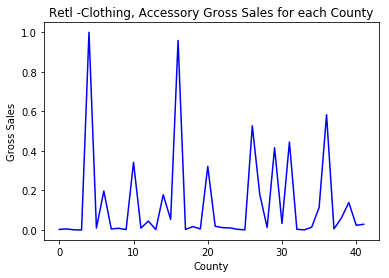

In [6]:
# Gross Sales for each county.

plt.plot(Food_Sales_norm['Gross Sales'],'b')

plt.xlabel('County')

plt.ylabel('Gross Sales')

plt.title('Retl -Clothing, Accessory Gross Sales for each County')

### Plot RETL -CLOTHING, ACCESSORY GROSS SALES BY COUNTY

In [7]:
Retl_county_lst, Retl_Sales_norm = plot_by_industry(file, '448 RETL -CLOTHING, ACCESSORY')

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'Retl -Clothing, Accessory Gross Sales for each County')

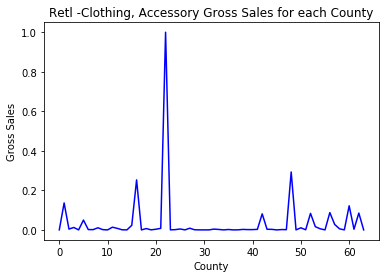

In [8]:
# Gross Sales for each county.

plt.plot(Retl_Sales_norm['Gross Sales'],'b')

plt.xlabel('County')

plt.ylabel('Gross Sales')

plt.title('Retl -Clothing, Accessory Gross Sales for each County')

### Compare 448 RETL -CLOTHING, ACCESSORY Industry Grosss sales with Total Gross sales by County

In [64]:
def total_gs_fnc(total_file, industry_county_lst):
    
    Gross_Sales_County = total_file.parse('MN_Industry')

    Gross_Sales_County = Gross_Sales_County[['COUNTY', 'GROSS SALES']]

    Gross_Sales_County = Gross_Sales_County.set_index('COUNTY')

    Gross_Sales_County = Gross_Sales_County.loc[industry_county_lst]

    Counties = Gross_Sales_County.index

    # Normalizaion

    Gross_Sales_Vals = Gross_Sales_County.values

    Gross_Sales_County_norm = norm_fnc(Gross_Sales_Vals)

    Gross_Sales_County_norm.columns=['Gross Sales']
    
    return Gross_Sales_County_norm

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


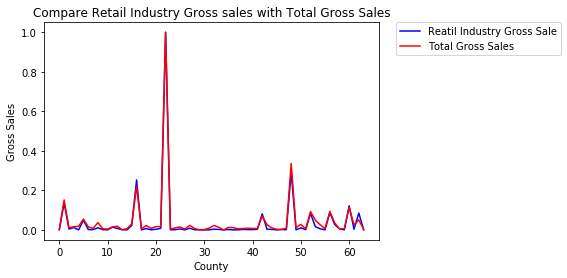

In [72]:
Gross_Sales_County_norm = total_gs_fnc(total_file, Retl_county_lst)

# Gross Sales for each county.

plt.plot(Retl_Sales_norm['Gross Sales'],'b',label='Reatil Industry Gross Sale')

plt.plot(Gross_Sales_County_norm['Gross Sales'],'r',label='Total Gross Sales')

plt.xlabel('County')

plt.ylabel('Gross Sales')

plt.title('Compare Retail Industry Gross sales with Total Gross Sales')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Plot 531 REAL ESTATE GROSS SALES BY COUNTY

In [48]:
Real_Estate_county_lst, Real_Estate_Sales_norm = plot_by_industry(file, '531 REAL ESTATE')

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'REAL ESTATE Gross Sales for each County')

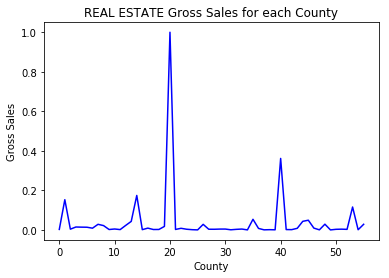

In [49]:
# Gross Sales for each county.

plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b')

plt.xlabel('County')

plt.ylabel('Gross Sales')

plt.title('REAL ESTATE Gross Sales for each County')

In [69]:
Gross_Sales_County_norm=total_gs_fnc(total_file, Real_Estate_county_lst)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


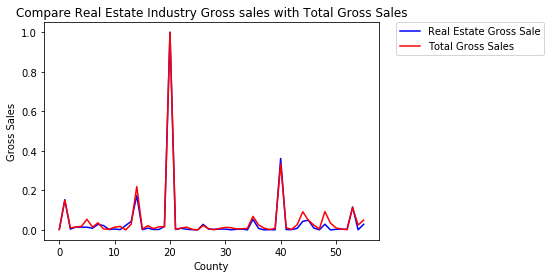

In [70]:
plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b',label='Real Estate Gross Sale')

plt.plot(Gross_Sales_County_norm['Gross Sales'],'r',label='Total Gross Sales')

plt.xlabel('County')

plt.ylabel('Gross Sales')

plt.title('Compare Real Estate Industry Gross sales with Total Gross Sales')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot Charts for Indices

In [53]:
Industry_Raw_Data_files = [x for x in os.listdir(r'C:\Users\PL_Dell3668_One\Desktop\MN_Industry\Corr_Industry\Industry_Raw_Data\Indices_Industry')]

In [ ]:
Industry_Raw_Data_files[0][:-5]

## Plot Charts for Extremely high Variables for RETL -CLOTHING Industry

In [78]:
RETL_file = pd.ExcelFile('C:\\Users\\PL_Dell3668_One\\Desktop\\MN_Industry\\Corr_Industry\\Industry_Raw_Data\\Indices_Industry\\448 RETL -CLOTHING, ACCESSORY.xlsx')

### Process II Yearly for RETL Industry

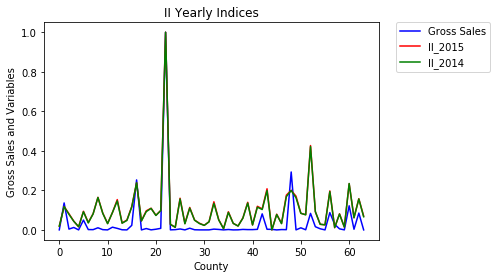

In [79]:
II_Raw_Data_norm = gen_norm_indices(RETL_file, 'II Yearly')

plt.plot(Retl_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(II_Raw_Data_norm[2015], 'r', label='II_2015')

plt.plot(II_Raw_Data_norm[2014], 'g', label='II_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('II Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Process AI Yearly for RETL Industry

In [12]:
AI_Raw_Data_norm = gen_norm_indices(RETL_file, 'AI Yearly')

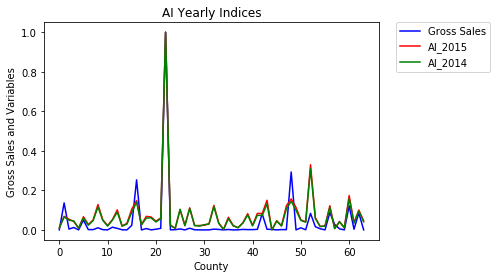

In [13]:
plt.plot(Retl_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(AI_Raw_Data_norm[2015], 'r', label='AI_2015')

plt.plot(AI_Raw_Data_norm[2014], 'g', label='AI_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('AI Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Process WI Yearly for RETL Industry

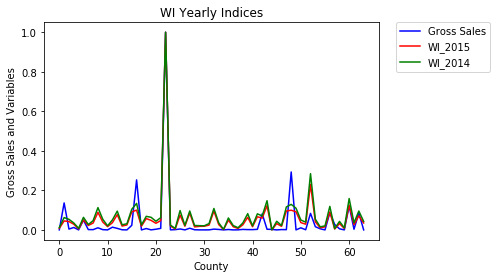

In [32]:
WI_Raw_Data_norm = gen_norm_indices(RETL_file, 'WI Yearly')

plt.plot(Retl_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(WI_Raw_Data_norm[2015], 'r', label='WI_2015')

plt.plot(WI_Raw_Data_norm[2014], 'g', label='WI_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('WI Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Process HPI Yearly for Retail Industry

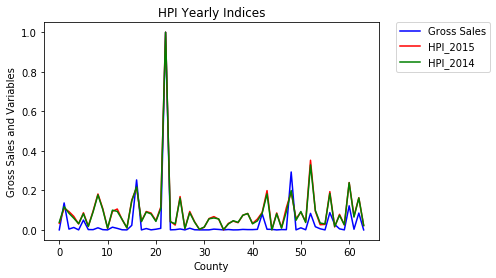

In [41]:
HPI_Raw_Data_norm = gen_norm_indices(RETL_file, 'HPI Yearly')

plt.plot(Retl_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(HPI_Raw_Data_norm[2015], 'r', label='HPI_2015')

plt.plot(HPI_Raw_Data_norm[2014], 'g', label='HPI_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('HPI Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Plot Charts for Medium High Variables for 448 RETL -CLOTHING, ACCESSORY Industry

### Process EHI Quarterly 

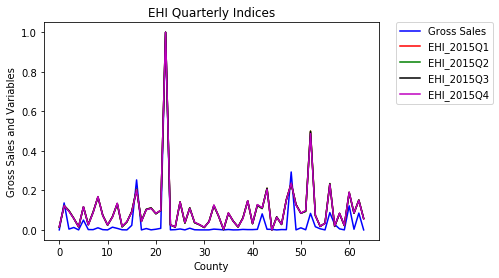

In [81]:
EHI_Raw_Data_norm = gen_norm_indices(RETL_file, 'EHI Quarterly')

plt.plot(Retl_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(EHI_Raw_Data_norm['2015Q1'], 'r', label='EHI_2015Q1')

plt.plot(EHI_Raw_Data_norm['2015Q2'], 'g', label='EHI_2015Q2')

plt.plot(EHI_Raw_Data_norm['2015Q3'], 'k', label='EHI_2015Q3')

plt.plot(EHI_Raw_Data_norm['2015Q4'], 'm', label='EHI_2015Q4')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('EHI Quarterly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Plot Charts for Extremely high Variables for 531 REAL ESTATE Industry

In [44]:
# load Real Estate Industry raw data by county

Real_Estate_file = pd.ExcelFile('C:\\Users\\PL_Dell3668_One\\Desktop\\MN_Industry\\Corr_Industry\\Industry_Raw_Data\\Indices_Industry\\531 REAL ESTATE.xlsx')

### Process II Yearly for 531 REAL ESTATE Industry

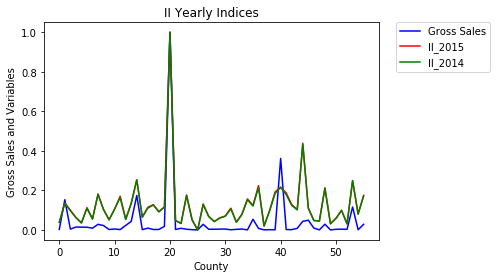

In [75]:
II_Raw_Data_norm = gen_norm_indices(Real_Estate_file, 'II Yearly')

plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(II_Raw_Data_norm[2015], 'r', label='II_2015')

plt.plot(II_Raw_Data_norm[2014], 'g', label='II_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('II Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Process AI Yearly for 531 REAL ESTATE INDUSTRY

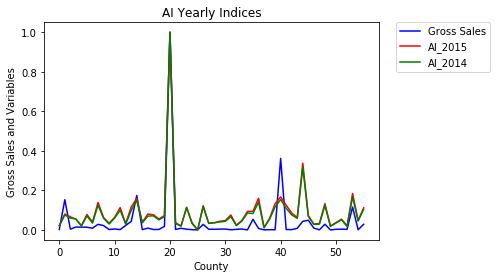

In [50]:
AI_Raw_Data_norm = gen_norm_indices(Real_Estate_file, 'AI Yearly')

plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(AI_Raw_Data_norm[2015], 'r', label='AI_2015')

plt.plot(AI_Raw_Data_norm[2014], 'g', label='AI_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('AI Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Process WI Yearly 

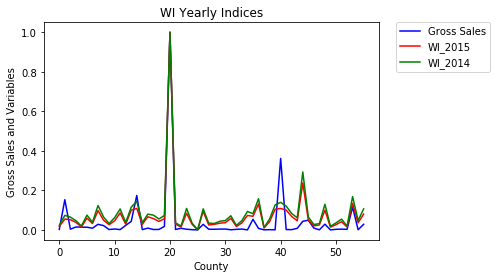

In [73]:
WI_Raw_Data_norm = gen_norm_indices(Real_Estate_file, 'WI Yearly')

plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(WI_Raw_Data_norm[2015], 'r', label='WI_2015')

plt.plot(WI_Raw_Data_norm[2014], 'g', label='WI_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('WI Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Process HPI Yearly

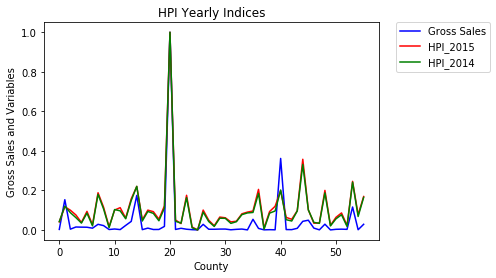

In [74]:
HPI_Raw_Data_norm = gen_norm_indices(Real_Estate_file, 'HPI Yearly')

plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(HPI_Raw_Data_norm[2015], 'r', label='HPI_2015')

plt.plot(HPI_Raw_Data_norm[2014], 'g', label='HPI_2014')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('HPI Yearly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

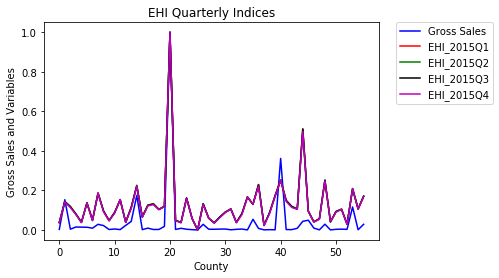

In [83]:
EHI_Raw_Data_norm = gen_norm_indices(Real_Estate_file, 'EHI Quarterly')

plt.plot(Real_Estate_Sales_norm['Gross Sales'],'b', label='Gross Sales')

plt.plot(EHI_Raw_Data_norm['2015Q1'], 'r', label='EHI_2015Q1')

plt.plot(EHI_Raw_Data_norm['2015Q2'], 'g', label='EHI_2015Q2')

plt.plot(EHI_Raw_Data_norm['2015Q3'], 'k', label='EHI_2015Q3')

plt.plot(EHI_Raw_Data_norm['2015Q4'], 'm', label='EHI_2015Q4')

plt.xlabel('County')

plt.ylabel('Gross Sales and Variables')

plt.title('EHI Quarterly Indices')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)